# Training and Testing

### Dataset 1: World Happiness Report up to 2020
Our goal is to predict the happiness score of a country using both Single and Multiple Linear Regression Models. You can access the World Happiness Report dataset here: www.kaggle.com/mathurinache/world-happiness-report 

#### What is Linear Regression?
Linear regression is statistical modelling technique used in supervised machine learning algorithm. Linear regression is used for predictive analysis, by displaying the relationship between two variables (x and y). 

In [1]:
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

In [2]:
DATASET_PATH = './datasets/happiness/2015.csv'

#create pandas object
happiness = load_data(DATASET_PATH)

In [3]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Single Linear Regression
We'll be building a Single Linear Regression model to display the linear relationship between Economy (GDP per Capita) and a country's Happiness Score. This will hopefully allow us to predict a country's Happiness Score based on its Economy.
Single Linear Regression is a statistical method that shows the relationships between two continuous variables. The independent or explanatory variable (x), is the predictor, and y is the dependent variable.

#### Feature Selection

In [25]:
chosen_columns = ['Happiness Score','Economy (GDP per Capita)']
economy_happiness = happiness.filter(chosen_columns)
economy_happiness.head()

,Happiness Score,Economy (GDP per Capita)
0,7.587,1.39651
1,7.561,1.30232
2,7.527,1.32548
3,7.522,1.45900
4,7.427,1.32629


#### Train/test split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(economy_happiness.drop(['Happiness Score'], axis=1),economy_happiness['Happiness Score'],test_size=0.2,random_state=42)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (126, 1) (32, 1)
y train/test  (126,) (32,)


#### Convert from pandas to np

In [37]:
print(type(x_train),type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [38]:
x = x_train.values
y=y_train.values

In [39]:
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### Create and train the model

In [28]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

If the coefficient of x is positive, then there exists a positive relationship between x (Economy) and y (the Happiness Score). If the coefficient of x is negative, then the relationship between x and y is negative, meaning as x increases, y decreases.

In [ ]:
lin_reg_model.coef_, lin_reg_model.intercept_

#### Test and evaluate the model

In [31]:
#convert the panda dataframe/series into np arrays
test_x = x_test.values
test_y = y_test.values

#pass the test x dataset into the model
predictions = lin_reg_model.predict(test_x)

* The mean squared error indicates how close a regression line is to a set of points. 
* The distances between the points and the regression line (error between predicted value and actual value) are squared.
* Squaring removes any negative signs and emphasises large errors.
* The mean of all the squared errors represents the average of the errors 

In [32]:
#mean squared error
np.mean((predictions - test_y) ** 2)

0.5080153381136627

**Visualise the predictions v Actual Happiness Scores**

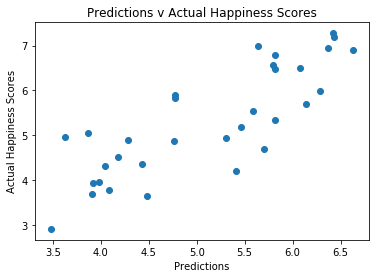

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(lin_reg_model.predict(test_x), test_y)
plt.title('Predictions v Actual Happiness Scores')
plt.xlabel('Predictions')
plt.ylabel('Actual Happiness Scores');

### Multiple Linear Regression
Multiple linear regression is a statistical modelling technique that uses several predictors, or explanatory variables to predict the dependent variable (y). Multiple Linear Regression can provide better prediction reliability, and lower error because the combination of independent variables can lead to a higher probabliity of a given outcome. For example, if a country has a high GDP per capita (wealthy) it is more likely that people will be healthy, with a strong family unit, meaning they will be happiness overall. Therefore we would expect our Multiple Linear Regression model to outperform our Single Linear Regression model, which relies solely on Economy to predict happiness. 

**Feature Selection**

In [34]:
chosen_features = ['Happiness Score','Family', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Freedom']
multiple_happiness = happiness.filter(chosen_features)
multiple_happiness.head()

,Happiness Score,Family,Health (Life Expectancy),Economy (GDP per Capita),Freedom
0,7.587,1.34951,0.94143,1.39651,0.66557
1,7.561,1.40223,0.94784,1.30232,0.62877
2,7.527,1.36058,0.87464,1.32548,0.64938
3,7.522,1.33095,0.88521,1.45900,0.66973
4,7.427,1.32261,0.90563,1.32629,0.63297


**Create the train/test splits**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(multiple_happiness.drop(['Happiness Score'], axis=1),multiple_happiness['Happiness Score'],test_size=0.2,random_state=42)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (126, 4) (32, 4)
y train/test  (126,) (32,)


**Prepare the training sets**

In [40]:
#convert from pandas dataframe/series to np array for training
x = x_train.values
y=y_train.values

**Create and train a linear regression model**

In [41]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lin_reg_model.coef_,lin_reg_model.intercept_

(array([1.20973375, 1.06133406, 0.91949607, 1.74411857]), 1.960421057319616)

**Let's test it!**

In [43]:
#convert the panda dataframe/series into np arrays
test_x = x_test.values
test_y = y_test.values

#pass the test x dataset into the model
predictions = lin_reg_model.predict(test_x)

**Let's Evaluate it!**

In [44]:
#mean squared error
np.mean((predictions - test_y) ** 2)

0.2320463982294615

In [46]:
#see the results
for each, actual_happiness, preds in zip(test_x, test_y, predictions):
    print(each, actual_happiness, preds)

[0.70905 0.48246 0.27108 0.44017] 4.3069999999999995 4.347199667982519
[1.25712 0.99111 1.27074 0.49615] 5.987 6.566885214446166
[0.747   0.61712 0.8818  0.17288] 4.194 4.6313974975723315
[0.41587 0.22396 0.0153  0.1185 ] 2.905 2.921955747845097
[0.95152 0.43873 0.18847 0.46582] 5.0569999999999995 4.56288874190275
[1.24823 0.78723 1.05351 0.44974] 6.574 6.0590592182554275
[1.04103 0.07612 0.37545 0.31767] 4.898 4.199857874493746
[0.73803 0.54909 0.59066 0.59591] 4.876 5.018456020765323
[0.91916 0.79081 0.83223 0.09245] 4.949 4.838149496430775
[1.13299 0.33861 0.21102 0.45727] 3.931 4.681980781245059
[1.12575 0.80925 1.42727 0.64157] 6.901 6.612506721311087
[1.14184 0.74314 0.59325 0.55475] 5.827999999999999 5.643504054954601
[1.23287 0.69702 0.98124 0.49049] 6.983 5.94935561254865
[1.22668 0.53886 0.95847 0.4761 ] 5.547999999999999 5.72797197341618
[1.1985  0.79661 1.06353 0.5421 ] 6.7860000000000005 6.179154614012047
[1.20643 0.84483 1.17898 0.46364] 6.505 6.209237609834251
[0.95571 0

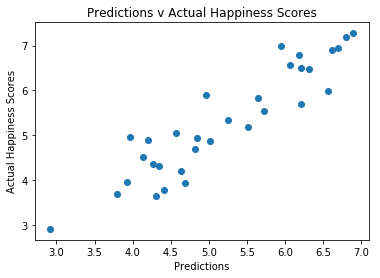

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(lin_reg_model.predict(test_x), test_y)
plt.title('Predictions v Actual Happiness Scores')
plt.xlabel('Predictions')
plt.ylabel('Actual Happiness Scores');

### Exercise
* Create Simple and Multiple Linear Regression Models trained on stratified training sets
* Evaluate the models and compare the results to those presented in this notebook
* Are the results better, worse or the same? Why?